In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
import pickle

from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from yellowbrick.classifier import ConfusionMatrix

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Read pickle data

In [2]:
with open('./data/titanic.pkl', 'rb') as f:
   X_titanic_train, y_titanic_train, X_titanic_test, y_titanic_test = pickle.load(f)

In [3]:
X_titanic_train.shape, y_titanic_train.shape

((891, 21), (891,))

In [4]:
X_titanic_test.shape, y_titanic_test.shape

((418, 21), (418,))

# Tunning

In [5]:
X_titanic = np.concatenate((X_titanic_train, X_titanic_test), axis=0)
y_titanic = np.concatenate((y_titanic_train, y_titanic_test), axis=0)

In [6]:
params = {'activation': ['relu', 'logistic', 'tanh'],
              'solver': ['adam', 'sgd'],
              'hidden_layer_sizes': [(8,), (8,8), (8,8,8)],
              'tol': [0.00010, 0.000010, 0.0000010]}

In [7]:
grid_search = GridSearchCV(estimator=MLPClassifier(max_iter=10000, tol=0.000010), param_grid=params)
grid_search.fit(X_titanic, y_titanic)
best_param = grid_search.best_params_
best_result = grid_search.best_score_
print("Best Param: {} and Best Socore: {}".format(best_param, best_result))

Best Param: {'activation': 'logistic', 'hidden_layer_sizes': (8, 8, 8), 'solver': 'adam', 'tol': 1e-06} and Best Socore: 0.8633295311631717


# Treinamento Inicial

In [8]:
neural_network = MLPClassifier(
   verbose=True,
   max_iter=2000,
   activation=best_param['activation'],
   hidden_layer_sizes=best_param['hidden_layer_sizes'],
   solver=best_param['solver'],
   tol=best_param['tol'],
)
neural_network.fit(X_titanic_train, y_titanic_train)

Iteration 1, loss = 0.67220327
Iteration 2, loss = 0.67051034
Iteration 3, loss = 0.66903196
Iteration 4, loss = 0.66790877
Iteration 5, loss = 0.66710486
Iteration 6, loss = 0.66647543
Iteration 7, loss = 0.66589775
Iteration 8, loss = 0.66572604
Iteration 9, loss = 0.66538151
Iteration 10, loss = 0.66510184
Iteration 11, loss = 0.66478181
Iteration 12, loss = 0.66446745
Iteration 13, loss = 0.66436347
Iteration 14, loss = 0.66417246
Iteration 15, loss = 0.66397839
Iteration 16, loss = 0.66375128
Iteration 17, loss = 0.66342340
Iteration 18, loss = 0.66309945
Iteration 19, loss = 0.66270381
Iteration 20, loss = 0.66223421
Iteration 21, loss = 0.66173787
Iteration 22, loss = 0.66116903
Iteration 23, loss = 0.66052317
Iteration 24, loss = 0.65983231
Iteration 25, loss = 0.65907267
Iteration 26, loss = 0.65831929
Iteration 27, loss = 0.65745862
Iteration 28, loss = 0.65648263
Iteration 29, loss = 0.65556608
Iteration 30, loss = 0.65452912
Iteration 31, loss = 0.65349122
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(8, 8, 8),
              max_iter=2000, tol=1e-06, verbose=True)

In [9]:
predictors = neural_network.predict(X_titanic_test)

In [10]:
accuracy_score(y_titanic_test, predictors)

0.8803827751196173

/home/romulo/codes/projects/ml-titanic-survivor/.venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


0.8803827751196173

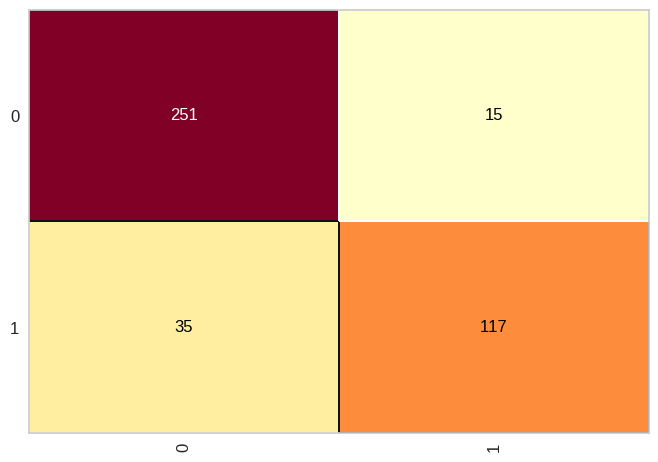

In [11]:
cm = ConfusionMatrix(neural_network)
cm.fit(X_titanic_train, y_titanic_train)
cm.score(X_titanic_test, y_titanic_test)

In [12]:
print(classification_report(y_titanic_test, predictors))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       266
           1       0.89      0.77      0.82       152

    accuracy                           0.88       418
   macro avg       0.88      0.86      0.87       418
weighted avg       0.88      0.88      0.88       418



Informa que 21 pessoas que *sobrevivem* *morrem* (FP)
Informa que 14 pessoas que *morrem* ficam *vivas* (FN)

Possui uma taxa de 91% de acertos

- Acerta 92% de 0 e desses 95% estão certos
- Acerta 91% de 1 e desses 87% estão certos 